In [1]:
cd ~/Desktop/DeepLearningPilot/

/Users/jz-rolling/Desktop/DeepLearningPilot


In [2]:
import tensorflow as tf,matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize,rescale
from skimage import measure, segmentation,morphology,filters,feature,exposure
import tifffile
import momia2 as mo
from momia2.classify.classifier_helper import *
import timeit
import pickle as pk
from tensorflow import keras
from unet import *
import glob, os
import seaborn as sns
from microfilm.microplot import microshow
from matplotlib.gridspec import GridSpec as gs

In [3]:
ctrl = tifffile.imread('/Volumes/JZSSD_temp/202212_Harry_plate_analysis/rpoA_timelapse/control/rpoA_timelapse_pos_2-1.tif')
exp = tifffile.imread('/Volumes/JZSSD_temp/202212_Harry_plate_analysis/rpoA_timelapse/deg/rpoA_timelapse_pos_4-5.tif')

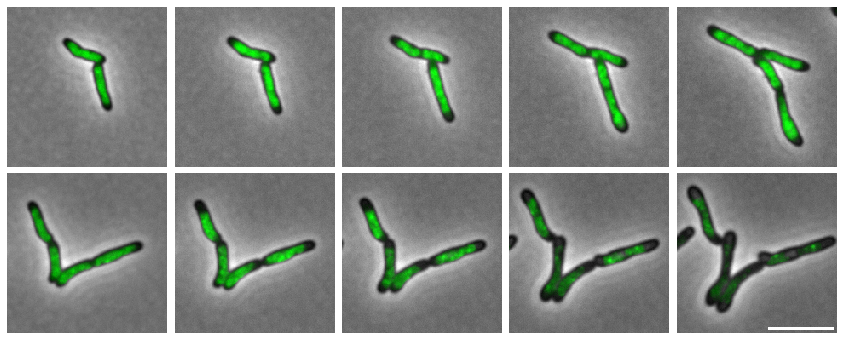

In [36]:
fig=plt.figure(figsize=(15,6))
grids = gs(2,5,wspace=0,hspace=0.04)

size=188
ctrl_start = (92,15)
exp_start = (24,100)
for c,i in enumerate([0,8,16,24,32]):
    ax = fig.add_subplot(grids[0,c])
    stack = [ctrl[i,0,ctrl_start[0]:ctrl_start[0]+size,ctrl_start[1]:ctrl_start[1]+size],
             normalize_image(ctrl[i,1,ctrl_start[0]:ctrl_start[0]+size,ctrl_start[1]:ctrl_start[1]+size],mask=True)]
    x=microshow(images=stack, fig_scaling=5,
                cmaps=['pure_green','gist_gray'],
                limits=[[500,3000],#[1500,5000],
                        [0,1]],
                unit='um', 
                scalebar_size_in_units=0, 
                scalebar_unit_per_pix=0.065, 
                scalebar_font_size=None,
                label_font_size=None,ax=ax)
    
for c,i in enumerate([0,8,16,24,32]):
    ax = fig.add_subplot(grids[1,c])
    stack = [exp[i,0,exp_start[0]:exp_start[0]+size,exp_start[1]:exp_start[1]+size],
             normalize_image(exp[i,1,exp_start[0]:exp_start[0]+size,exp_start[1]:exp_start[1]+size],mask=True)]
    if c==4:
        scale_bar = 5
    else:
        scale_bar = 0
    x=microshow(images=stack, fig_scaling=5,
                cmaps=['pure_green','gist_gray'],
                limits=[[500,3000],#[1500,5000],
                        [0,1]],
                unit='um', 
                scalebar_size_in_units=scale_bar, 
                scalebar_unit_per_pix=0.065, 
                scalebar_font_size=None,
                label_font_size=None,ax=ax)
plt.savefig('/Volumes/JZSSD_temp/202212_Harry_plate_analysis/rpoA_timelapse/demo.svg',bbox_inches='tight')

In [1]:
# PNG format

In [ ]:
x1,y1 = 800,1200
x2=x1+500
y2=y1+500
stack = [images[list(images.keys())[1]]['TRITC'][x1:x2,y1:y2],
         images[list(images.keys())[1]]['FITC'][x1:x2,y1:y2],
         images[list(images.keys())[1]]['CFP'][x1:x2,y1:y2],
         images[list(images.keys())[1]]['DAPI'][x1:x2,y1:y2],
         images[list(images.keys())[1]]['Phase_Ian'][x1:x2,y1:y2]]



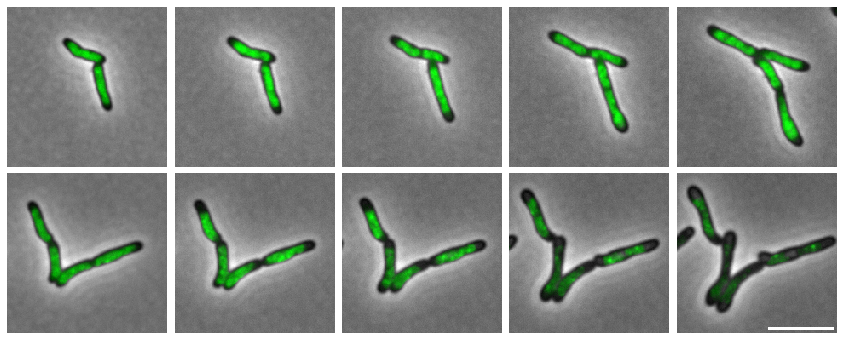

In [4]:
fig=plt.figure(figsize=(15,6))
grids = gs(2,5,wspace=0,hspace=0.04)

size=188
ctrl_start = (92,15)
exp_start = (24,100)
for c,i in enumerate([0,8,16,24,32]):
    ax = fig.add_subplot(grids[0,c])
    stack = [ctrl[i,0,ctrl_start[0]:ctrl_start[0]+size,ctrl_start[1]:ctrl_start[1]+size],
             normalize_image(ctrl[i,1,ctrl_start[0]:ctrl_start[0]+size,ctrl_start[1]:ctrl_start[1]+size],mask=True)]
    x=microshow(images=stack, fig_scaling=5,
                cmaps=['pure_green','gist_gray'],
                limits=[[500,3000],#[1500,5000],
                        [0,1]],
                unit='um', 
                scalebar_size_in_units=0, 
                scalebar_unit_per_pix=0.065, 
                scalebar_font_size=None,
                label_font_size=None,ax=ax)
    
for c,i in enumerate([0,8,16,24,32]):
    ax = fig.add_subplot(grids[1,c])
    stack = [exp[i,0,exp_start[0]:exp_start[0]+size,exp_start[1]:exp_start[1]+size],
             normalize_image(exp[i,1,exp_start[0]:exp_start[0]+size,exp_start[1]:exp_start[1]+size],mask=True)]
    if c==4:
        scale_bar = 5
    else:
        scale_bar = 0
    x=microshow(images=stack, fig_scaling=5,
                cmaps=['pure_green','gist_gray'],
                limits=[[500,3000],#[1500,5000],
                        [0,1]],
                unit='um', 
                scalebar_size_in_units=scale_bar, 
                scalebar_unit_per_pix=0.065, 
                scalebar_font_size=None,
                label_font_size=None,ax=ax)
#plt.savefig('/Volumes/JZSSD_temp/202212_Harry_plate_analysis/rpoA_timelapse/demo.svg',bbox_inches='tight')
plt.savefig('/Volumes/JZSSD_temp/202212_Harry_plate_analysis/rpoA_timelapse/demo.png',bbox_inches='tight',dpi=300)